In [1]:
#Data Wrangling
import pandas as pd
import numpy as np
from sympy import *

#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Model Scores
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#Visualization
from matplotlib import pyplot as plt
import seaborn as sns

#Machine Learning Algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

## DataSet

In [5]:
cancer=pd.read_csv("E:/MSc MDS/Principles of Data Science/breast-cancer-wisconsin.csv")
cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [153]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
cancer.shape

(569, 33)

In [143]:
print('Features are:',','.join(cancer.columns))

Features are: diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [155]:
cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Data Preparation

### Finding Null Values

In [7]:
cancer.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [8]:
cancer['Unnamed: 32'].unique()

array([nan])

### Removing Unwanted Columns

Here there are 2 columns that are not required: 'id' and 'Unnamed: 32'. Hence we delete all the columns.

In [9]:
cancer=cancer.dropna(axis=1,how='all')
cancer=cancer.drop('id',axis=1)
cancer.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Exploration

In [11]:
cancernum=cancer.iloc[:,1:]
cancercols=cancernum.columns
cancernum.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


### Type of Cancer(Categorical)

Diagnosis is a variable that determines whether a person has cancer or not. It has 2 values: B and M. *M* represents *Malignant* means person has cancer and *B* represents *Benign* means person does not have cancer.

B    357
M    212
Name: diagnosis, dtype: int64


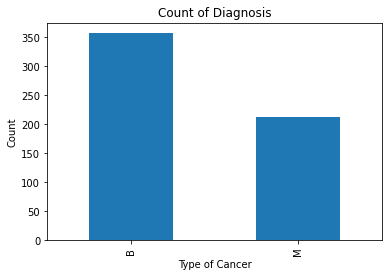

In [144]:
borm=cancer['diagnosis'].value_counts()
print(borm)
borm.plot(kind='bar')
plt.title('Count of Diagnosis')
plt.xlabel('Type of Cancer')
plt.ylabel('Count')
plt.show()

### Continuous Variables

Remaining variables are predictors, ie independent variables. They are moreover continuous variables. Thus we check the distribution of each variables.

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


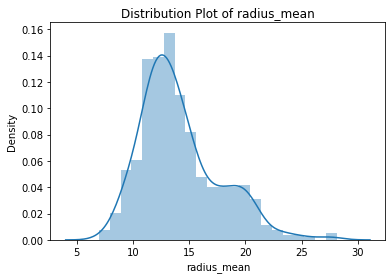

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


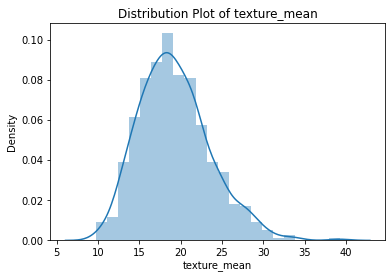

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


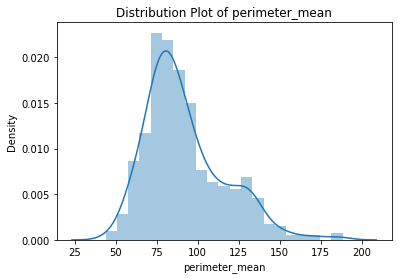

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


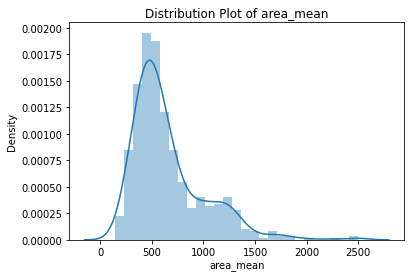

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


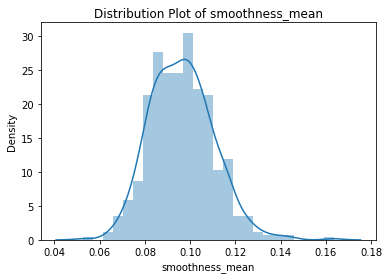

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


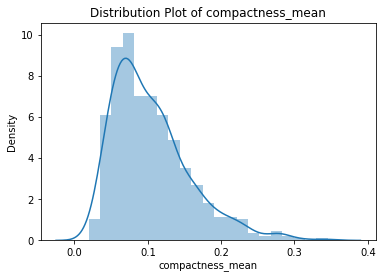

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


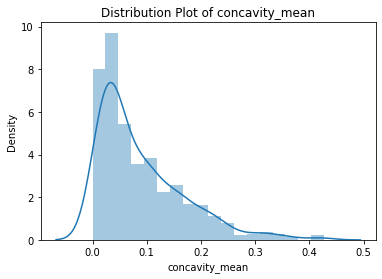

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


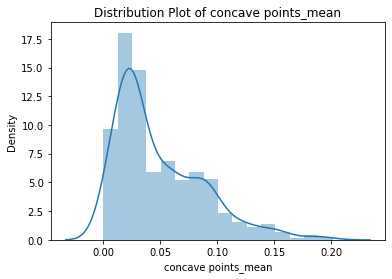

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


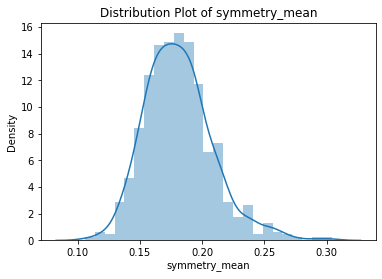

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


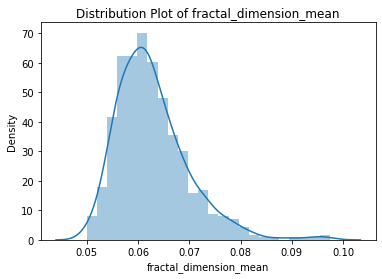

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


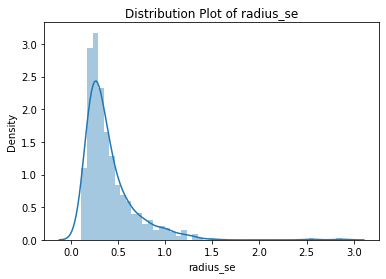

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


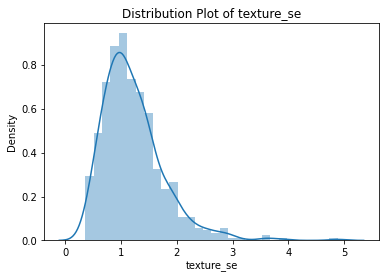

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


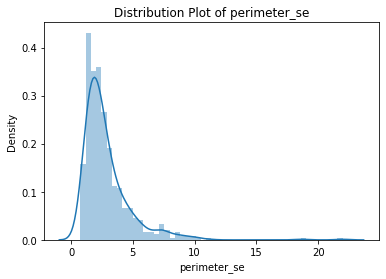

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


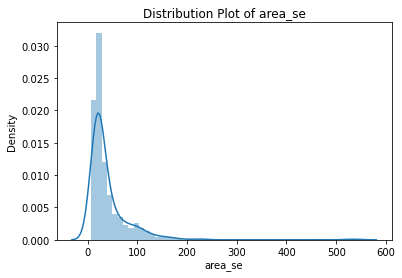

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


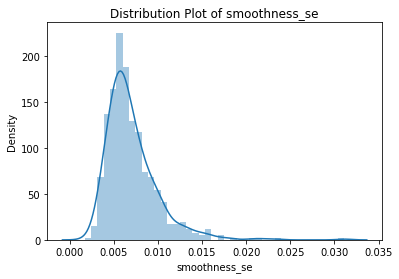

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


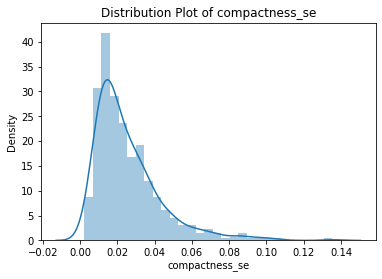

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


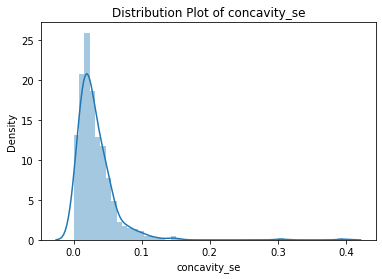

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


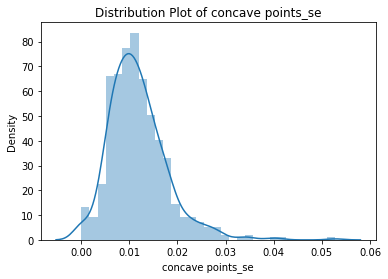

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


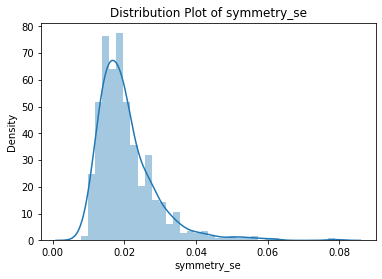

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


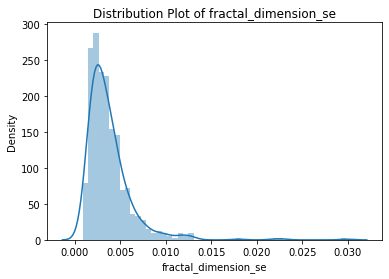

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


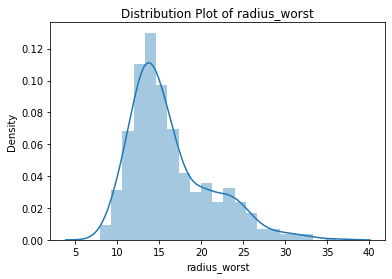

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


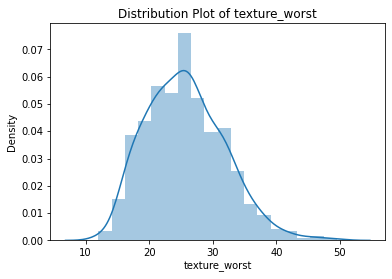

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


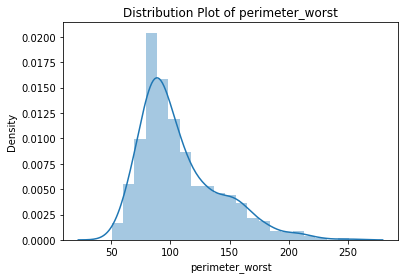

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


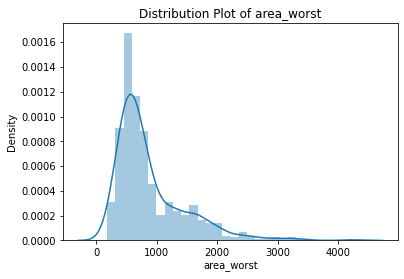

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


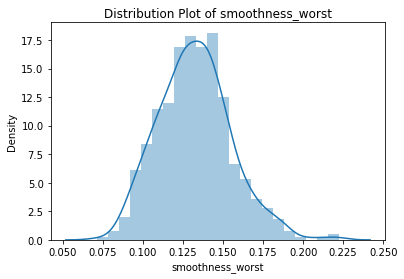

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


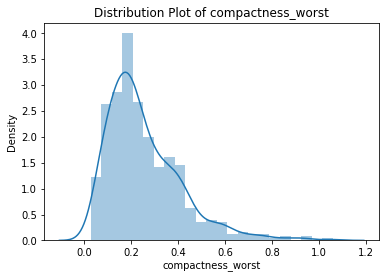

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


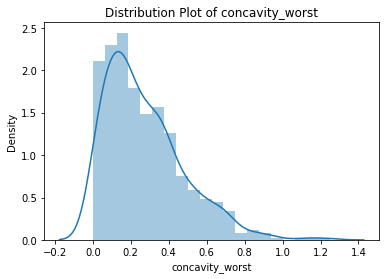

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


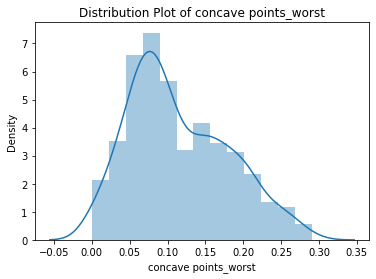

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


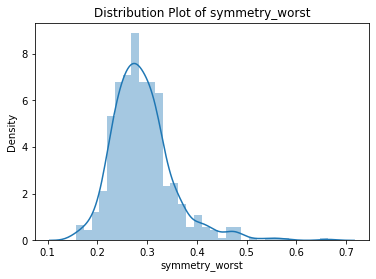

C:\Users\Thejus Srikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


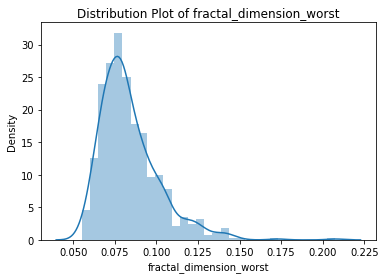

In [145]:
for cols in cancercols:
    sns.distplot(cancernum[cols])
    plt.title('Distribution Plot of '+cols)
    plt.show()

The graphical representation shows that all the continuous variables follow Normal Distribution. But very few follow symmetric pattern. Meanwhile majority of them follow right skewed distribution.

### Correlation Heatmap

Correlation refers to the degree of relationship between 2 variables. The correlation value usually lies between -1 and 1. If correlation value is negative, then one has inverse effect on the other. Else it has effect in the same direction. 
If correlation value is than 0.4, then low correlation. If correlation value lies between 0.4 and 0.7, then it follows moderate correlation. If the correlation value is greater than 0.7, then it follows high correlation. Higher the influence of one variable over other.

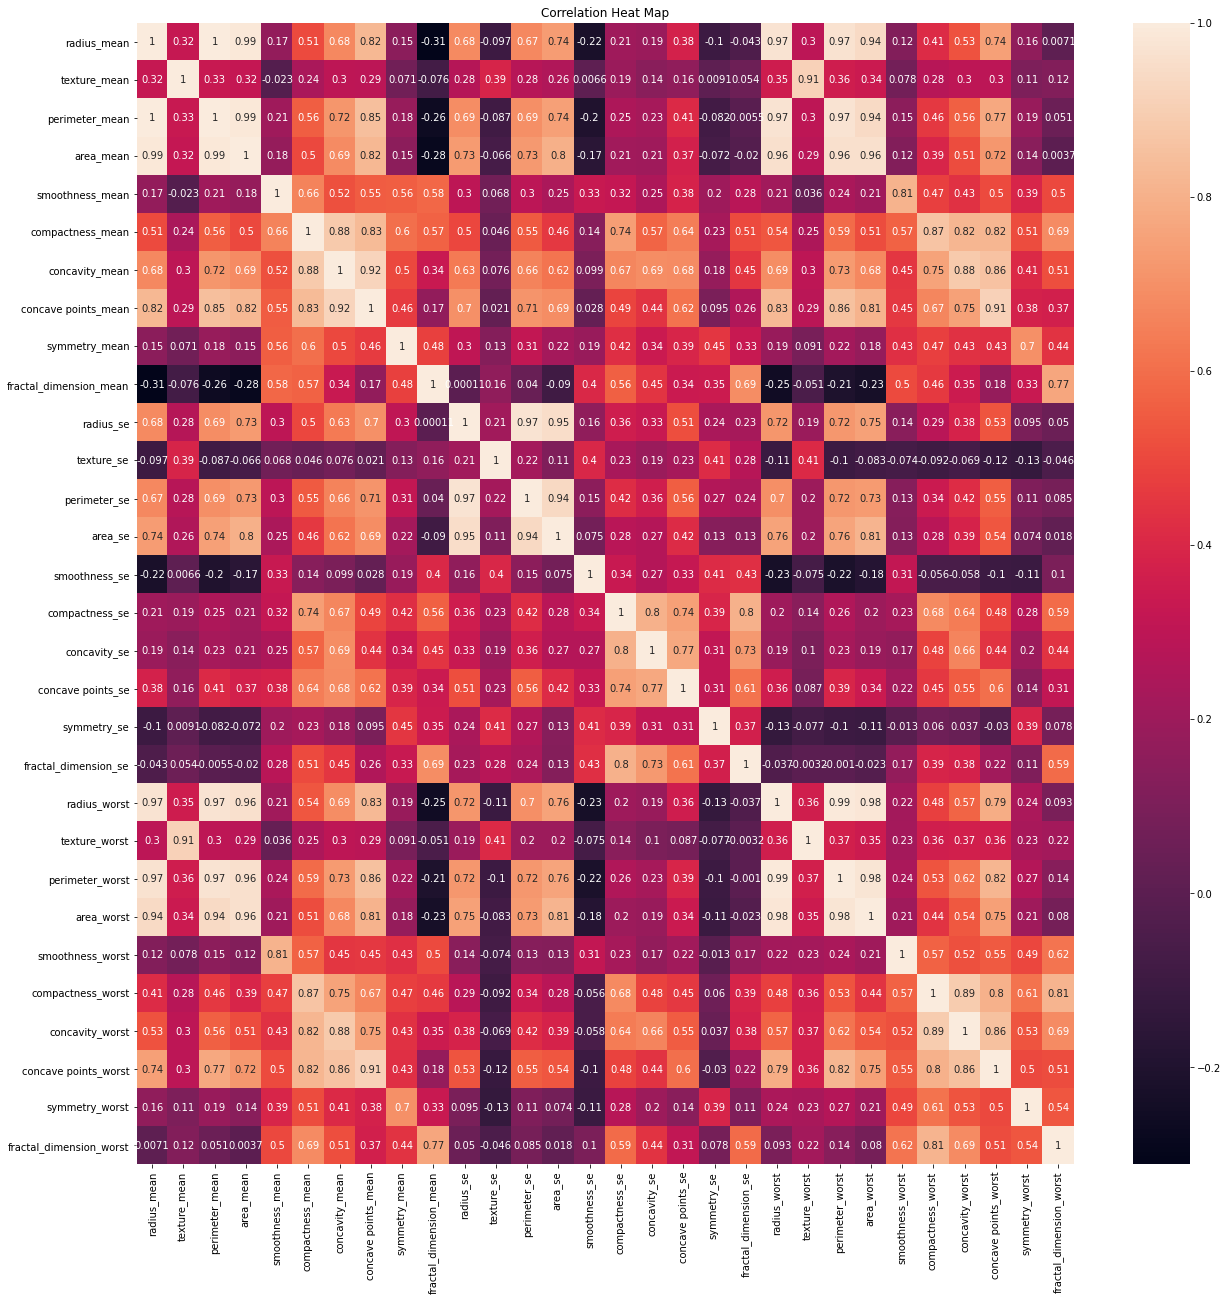

In [146]:
f, ax = plt.subplots(figsize=(21,21))
sns.heatmap(cancer_scaled.corr(),annot=True)
plt.title('Correlation Heat Map')
plt.show()

### Data Modelling

#### Feature Engineering

**1. Standardization**

There is a difference in the values between variables. Thus, there are computation issues followed by less efficient calculations. Thus there is a need of transformation in variables. 
We could also see that all variables follow Gaussian Distribution. Hence standardization is the transformation method used.

In [13]:
scaler=StandardScaler()
cancer_scaled=scaler.fit_transform(cancernum)
cancer_scaled=pd.DataFrame(cancer_scaled,columns=cancercols)
cancer_scaled.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


**2. Eliminating Unwanted Features**

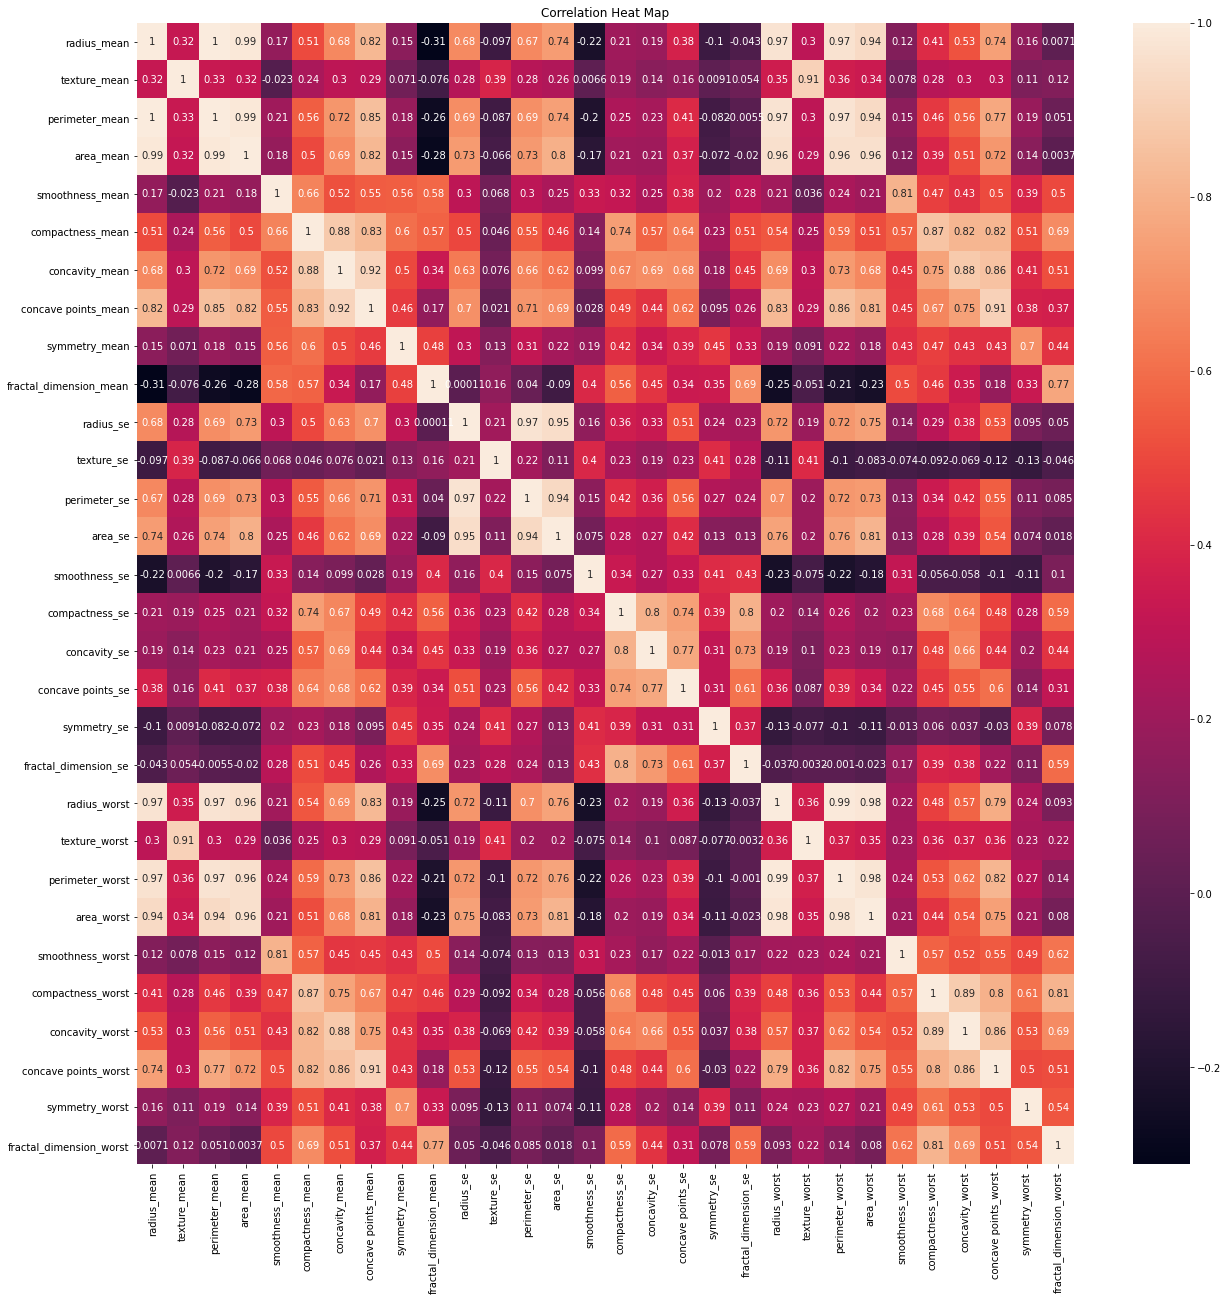

In [62]:
f, ax = plt.subplots(figsize=(21,21))
sns.heatmap(cancer_scaled.corr(),annot=True)
plt.title('Correlation Heat Map')
plt.show()

Heatmap is a graphical technique that shows how intense a phenomenon is. From the heatmap, we can see that there exists multicollinearity between the variables. Multicollinearity means there exists high correlation between the regressor variables. This can effect the performance of the model. Hence we eliminate these variables.

In [15]:
colsdropped=['perimeter_mean','area_mean','concavity_mean',
             'concave points_mean','radius_se','perimeter_se','area_se','compactness_se',
             'concavity_se','concave points_se','fractal_dimension_se','radius_worst', 'texture_worst',
             'perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 
             'concave points_worst','symmetry_worst', 'fractal_dimension_worst']
cancer_final=cancer_scaled.drop(colsdropped,axis=1)


In [16]:
cancer_final.head(2)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se
0,1.097064,-2.073335,1.568466,3.283515,2.217515,2.255747,-0.565265,-0.214002,1.148757
1,1.829821,-0.353632,-0.826962,-0.487072,0.001392,-0.868652,-0.876244,-0.605351,-0.805450


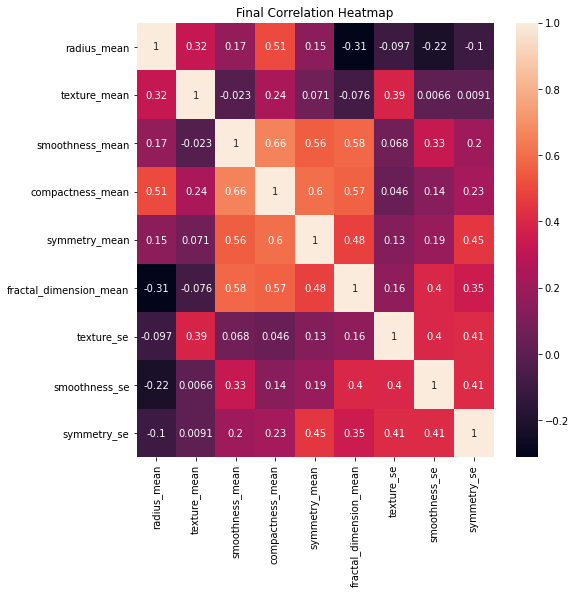

In [17]:
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cancer_final.corr(),annot=True)
plt.title('Final Correlation Heatmap')
plt.show()

From the above heatmap we can see that there does not exist a pair of variables that have correlation greater than 0.7. Hence no high correlation exists.

In [151]:
remfeatures=cancer_final.columns
print('The remaining features are:',','.join(remfeatures[0:-1]))

The remaining features are: radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se


**3. Label Encoding**

There is a categorical column called 'diagnosis' in main data. This variable is the dependent variable. Thus we need to convert it into numerical form for easy processing. Thus we use Label Enconding where *1* represents *Malignant* and *0* represents *Benign* category.

In [23]:
labencod=LabelEncoder()
diseaseenc=labencod.fit_transform(cancer['diagnosis'])

In [25]:
cancer_final['DiagnosisEnc']=diseaseenc

In [28]:
cancer_final.head(5)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,DiagnosisEnc
0,1.097064,-2.073335,1.568466,3.283515,2.217515,2.255747,-0.565265,-0.214002,1.148757,1
1,1.829821,-0.353632,-0.826962,-0.487072,0.001392,-0.868652,-0.876244,-0.605351,-0.805450,1
2,1.579888,0.456187,0.942210,1.052926,0.939685,-0.398008,-0.780083,-0.297005,0.237036,1
3,-0.768909,0.253732,3.283553,3.402909,2.867383,4.910919,-0.110409,0.689702,4.732680,1
4,1.750297,-1.151816,0.280372,0.539340,-0.009560,-0.562450,-0.790244,1.483067,-0.361092,1


#### Model Training and Validation

Training and Validation Stratergy here used is Train-Test Split where we split into train and test data where number of rows in train data is 75% of the total number of rows and test data is 25% of rows.

Here the models used are:
1. Logistic Regression
2. Decision Tree
3. Support Vector Classifier
4. Naive Bayes Classifier
5. Random Forest Classifier

The model validation scores used are:
1. Confusion Matrix
2. Accuarcy Score

In [46]:
X=cancer_final.iloc[:,0:-1]
Y=cancer_final.iloc[:,-1]

In [51]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,random_state=42)

In [128]:
log=LogisticRegression()#Logistic Regression
knngrid=GridSearchCV(estimator=KNeighborsClassifier(),
                     param_grid={'n_neighbors':np.arange(1,25)})#KNN
dectree=DecisionTreeClassifier(criterion="gini")#Decision Tree Classifier
svc=SVC()#Support Vector Classifier
gaussian=GaussianNB()#Naive Bayes Classifier
rfc=RandomForestClassifier()#Random Forest Classifier

In [142]:
algos={'Logistic Regression':log,
      'K Neighbours':knngrid,
      'Decision Tree':dectree,
      'Naive Bayes Classifier':gaussian,
      'Random Forest Classifier':rfc,
      'Support Vector Classifier':svc}
for algoname in algos.keys():
    algorithm=algos[algoname]
    print('Algorithm       :',algoname)
    print()
    algorithm.fit(Xtrain,Ytrain)
    predicted=algorithm.predict(Xtest)
    confuse=Matrix(confusion_matrix(Ytest,predicted))
    accuracy=accuracy_score(Ytest,predicted)
    print('Confusion Matrix:')
    pprint(confuse)
    print()
    print('Accuracy        :',round(accuracy,4)*100,'%')
    print('----------------------------------')

Algorithm       : Logistic Regression

Confusion Matrix:
⎡86  3 ⎤
⎢      ⎥
⎣2   52⎦

Accuracy        : 96.5 %
----------------------------------
Algorithm       : K Neighbours

Confusion Matrix:
⎡85  4 ⎤
⎢      ⎥
⎣8   46⎦

Accuracy        : 91.61 %
----------------------------------
Algorithm       : Decision Tree

Confusion Matrix:
⎡77  12⎤
⎢      ⎥
⎣6   48⎦

Accuracy        : 87.41 %
----------------------------------
Algorithm       : Naive Bayes Classifier

Confusion Matrix:
⎡83  6 ⎤
⎢      ⎥
⎣8   46⎦

Accuracy        : 90.21000000000001 %
----------------------------------
Algorithm       : Random Forest Classifier

Confusion Matrix:
⎡86  3 ⎤
⎢      ⎥
⎣3   51⎦

Accuracy        : 95.8 %
----------------------------------
Algorithm       : Support Vector Classifier

Confusion Matrix:
⎡88  1 ⎤
⎢      ⎥
⎣6   48⎦

Accuracy        : 95.1 %
----------------------------------


#### Model Conclusion

Thus we can see that among 5 algorithms: Logistic Regression has the highest accuracy of 96.5% followed by Random Forest Classifier with accuracy 95.8%, followed by Support Vector Classifier with accuracy 95.1%, Naive Bayes Classifier with accuracy 90.21%, and Decision Tree with the least accuracy 87.41%. 